In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, fftshift
import matplotlib.pyplot as plt


In [73]:
# Read the CSV file
df_phi_b = pd.read_csv('phi_b.csv')

# Display the first few rows of the DataFrame
print(df_phi_b.head())

   Phi  Points:0  Points:1  Points:2
0  1.0       0.0       0.0         0
1  1.0      25.6       0.0         0
2  1.0      51.2       0.0         0
3  1.0      76.8       0.0         0
4  1.0     102.4       0.0         0


In [74]:
# Extract the columns
phi = df_phi_b['Phi'].values
x = df_phi_b['Points:0'].values
y = df_phi_b['Points:1'].values

In [75]:
# Determine the grid dimensions (assuming a rectangular grid)
x_unique = np.unique(x)
y_unique = np.unique(y)
nx = len(x_unique)
ny = len(y_unique)

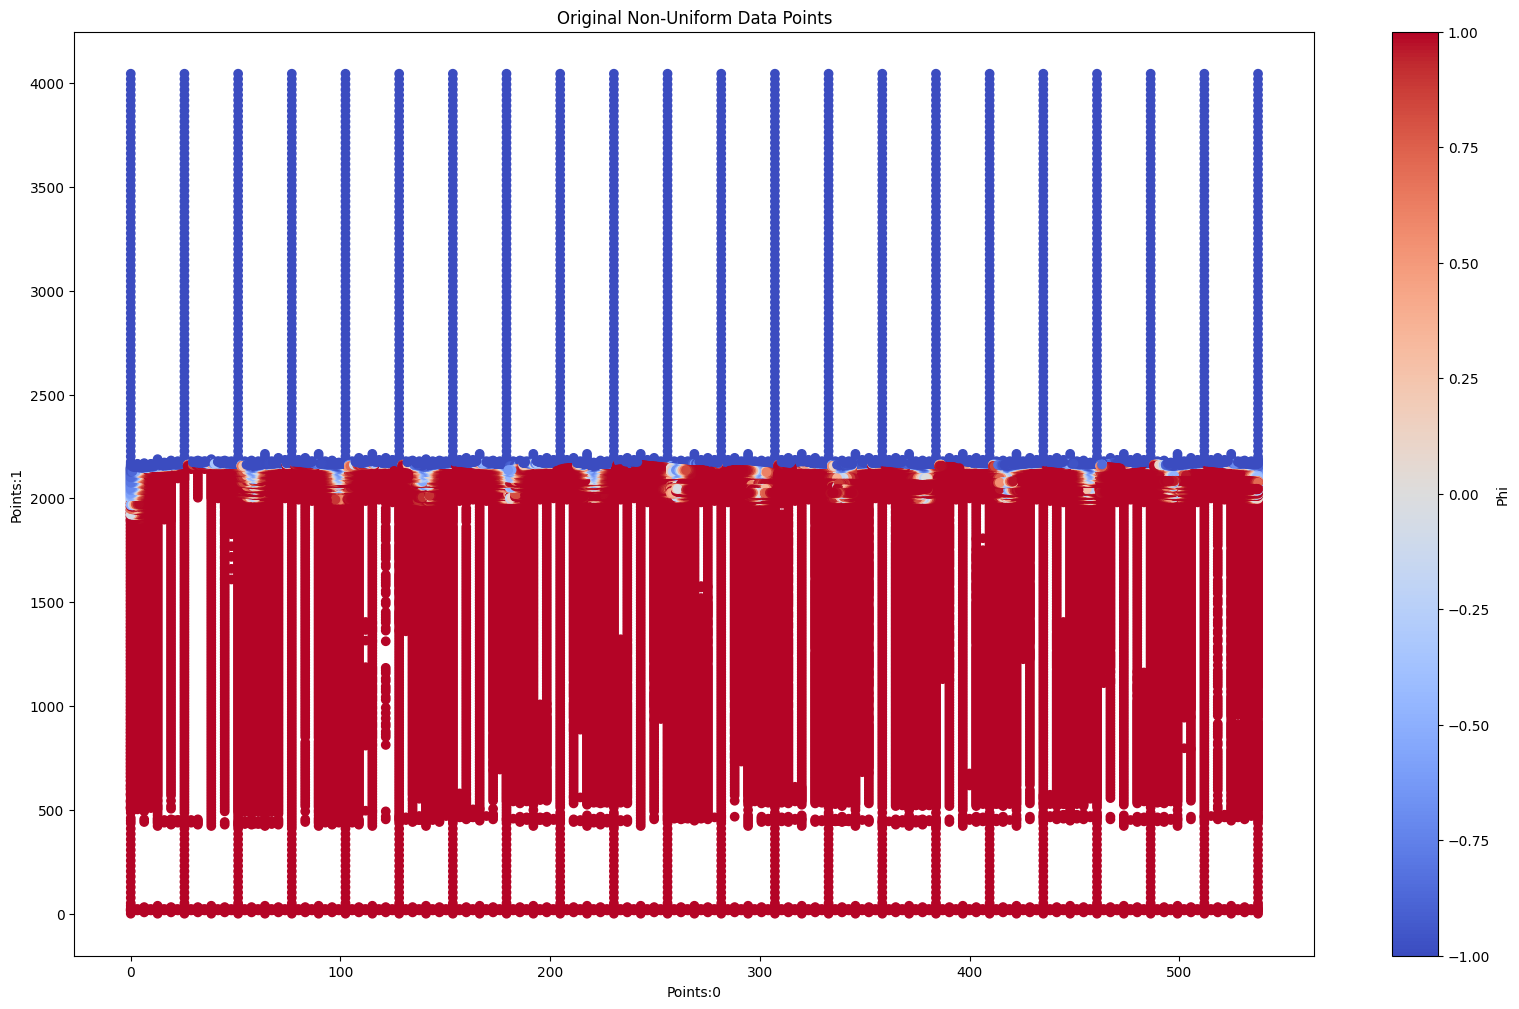

In [76]:
# Plot the original non-uniform data points
plt.figure(figsize=(20, 12))
plt.scatter(x, y, c=phi, cmap='coolwarm', marker='o')
plt.colorbar(label='Phi')
plt.title('Original Non-Uniform Data Points')
plt.xlabel('Points:0')
plt.ylabel('Points:1')
plt.show()

   Phi  Points:0  Points:1  Points:2
0  1.0       0.0       0.0         0
1  1.0      25.6       0.0         0
2  1.0      51.2       0.0         0
3  1.0      76.8       0.0         0
4  1.0     102.4       0.0         0


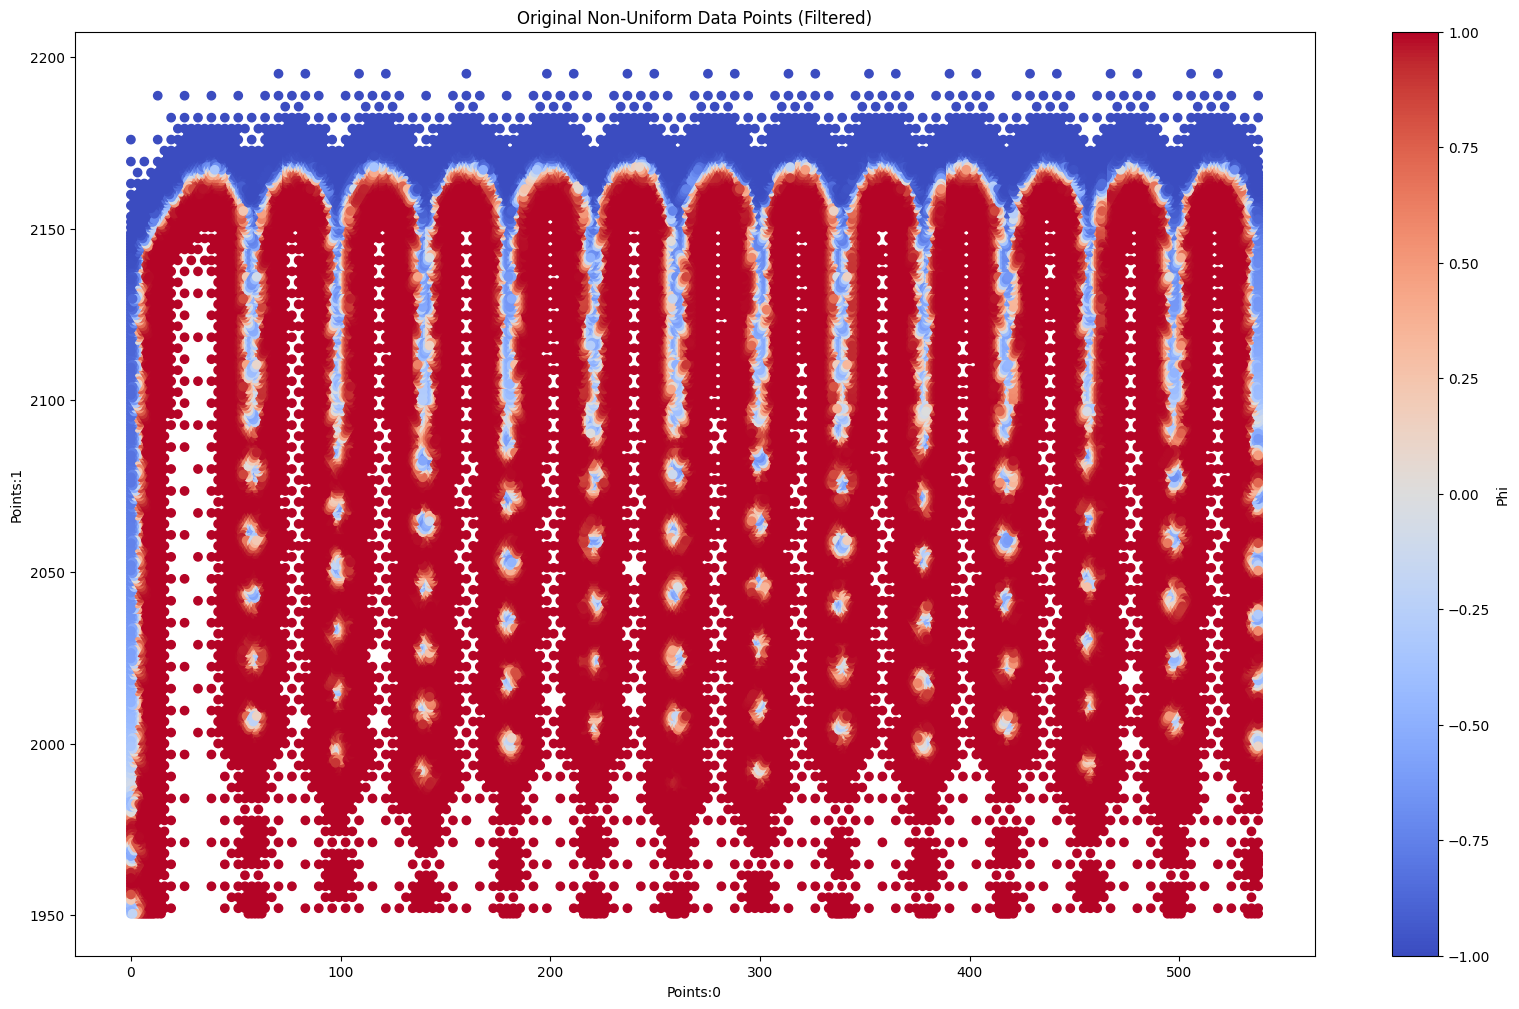

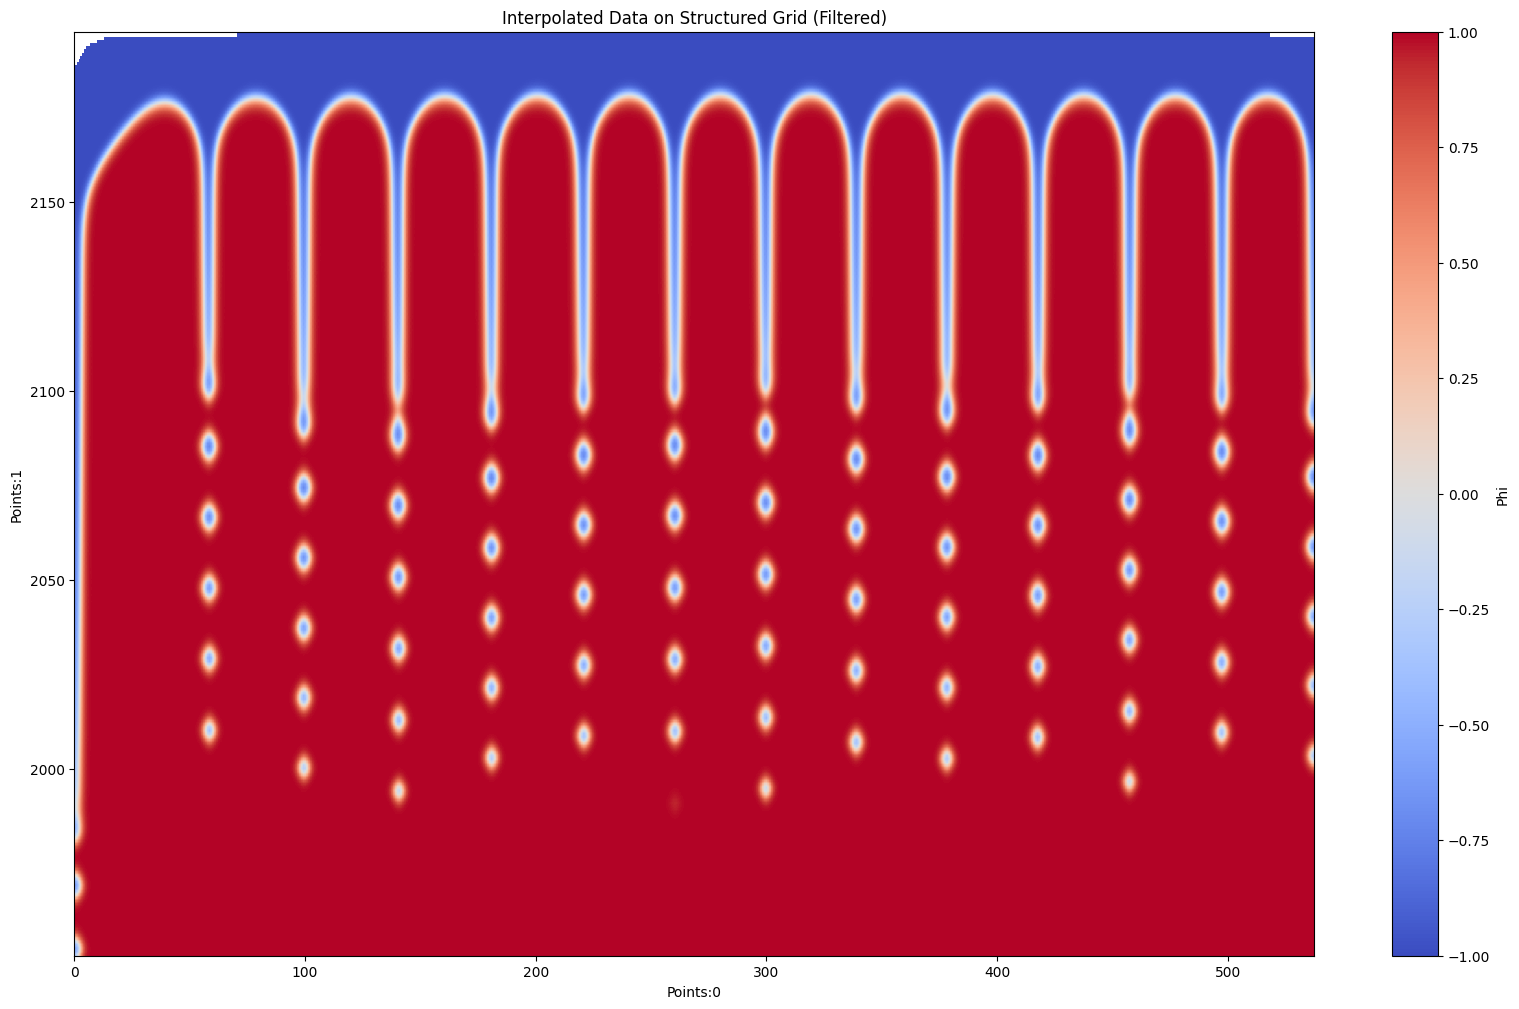

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Read the CSV file
df_phi_b = pd.read_csv('phi_b.csv')

# Display the first few rows of the DataFrame
print(df_phi_b.head())

# Extract the columns
phi = df_phi_b['Phi'].values
x = df_phi_b['Points:0'].values
y = df_phi_b['Points:1'].values

# Filter the data based on the condition
# condition = (y > 1810) & (y < 2270)
condition = (y > 1950) & (y < 2200)
phi_filtered = phi[condition]
x_filtered = x[condition]
y_filtered = y[condition]

# Determine the grid dimensions (assuming a rectangular grid)
x_unique = np.unique(x_filtered)
y_unique = np.unique(y_filtered)
nx = len(x_unique)
ny = len(y_unique)

# Create a meshgrid for the structured grid
X, Y = np.meshgrid(x_unique, y_unique)

# Interpolate the data to fit the grid
Z = griddata((x_filtered, y_filtered), phi_filtered, (X, Y), method='cubic')

# Plot the original non-uniform data points
plt.figure(figsize=(20, 12))
plt.scatter(x_filtered, y_filtered, c=phi_filtered, cmap='coolwarm', marker='o')
plt.colorbar(label='Phi')
plt.title('Original Non-Uniform Data Points (Filtered)')
plt.xlabel('Points:0')
plt.ylabel('Points:1')
plt.show()

# Plot the interpolated data on a structured grid
plt.figure(figsize=(20, 12))
plt.imshow(Z, extent=(x_filtered.min(), x_filtered.max(), y_filtered.min(), y_filtered.max()), origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label='Phi')
plt.title('Interpolated Data on Structured Grid (Filtered)')
plt.xlabel('Points:0')
plt.ylabel('Points:1')
plt.show()


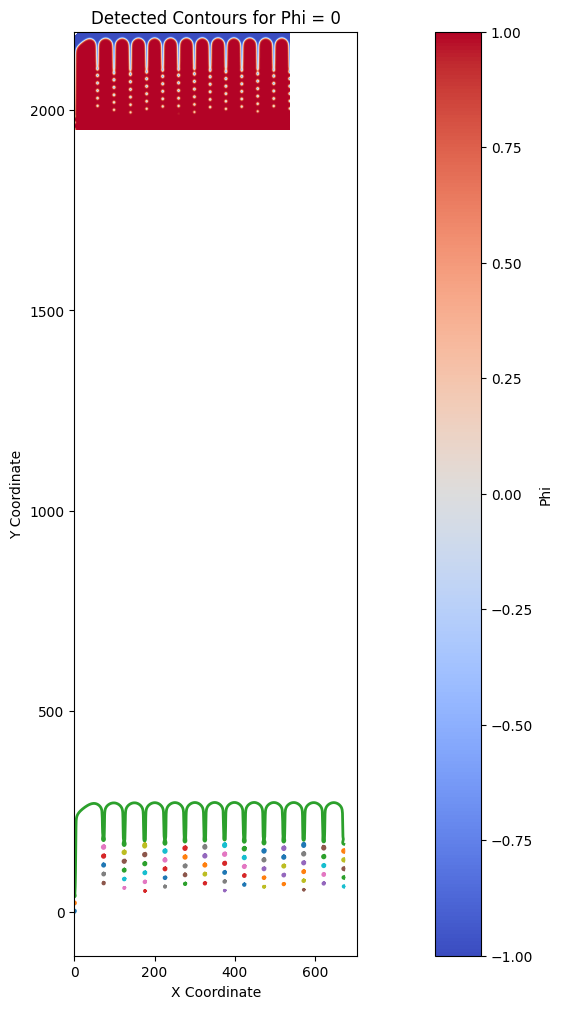

In [78]:
from skimage import measure

# Find contours at a constant value of 0
contours = measure.find_contours(Z, 0)


# Plot the contours
plt.figure(figsize=(20, 12))
plt.imshow(Z, cmap='coolwarm', origin='lower', extent=[x_filtered.min(), x_filtered.max(), y_filtered.min(), y_filtered.max()])
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)  # contour[:, 1] is x, contour[:, 0] is y
plt.title('Detected Contours for Phi = 0')
plt.colorbar(label='Phi')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


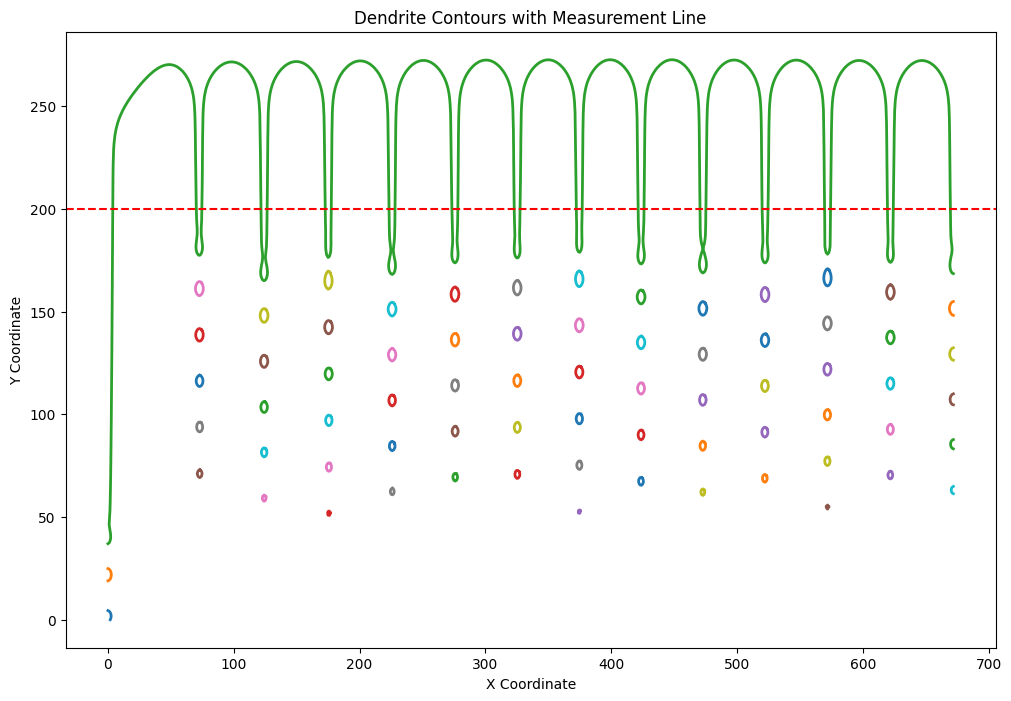

Estimated PDAS: 25.607267498646312 units


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Assume 'Z' is your phase field data array
contours = measure.find_contours(Z, 0)  # Find contours at phi = 0.5

# Define a horizontal line at a specific y-coordinate to measure PDAS
y_line = 200  # Adjust based on your data

# Plot contours and the line
plt.figure(figsize=(12, 8))
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
plt.axhline(y=y_line, color='red', linestyle='--')  # This is the line where we measure PDAS
plt.title('Dendrite Contours with Measurement Line')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Find intersections and measure distances
intersections = []
for contour in contours:
    xs = contour[:, 1][np.where((contour[:, 0] < y_line + 1) & (contour[:, 0] > y_line - 1))[0]]
    intersections.extend(xs)

# Sort and calculate distances if intersections are found
if intersections:
    intersections.sort()
    distances = np.diff(intersections)
    pdas = np.mean(distances)
    print(f"Estimated PDAS: {pdas} units")
else:
    print("No intersections found, check the position of the line or contour data.")


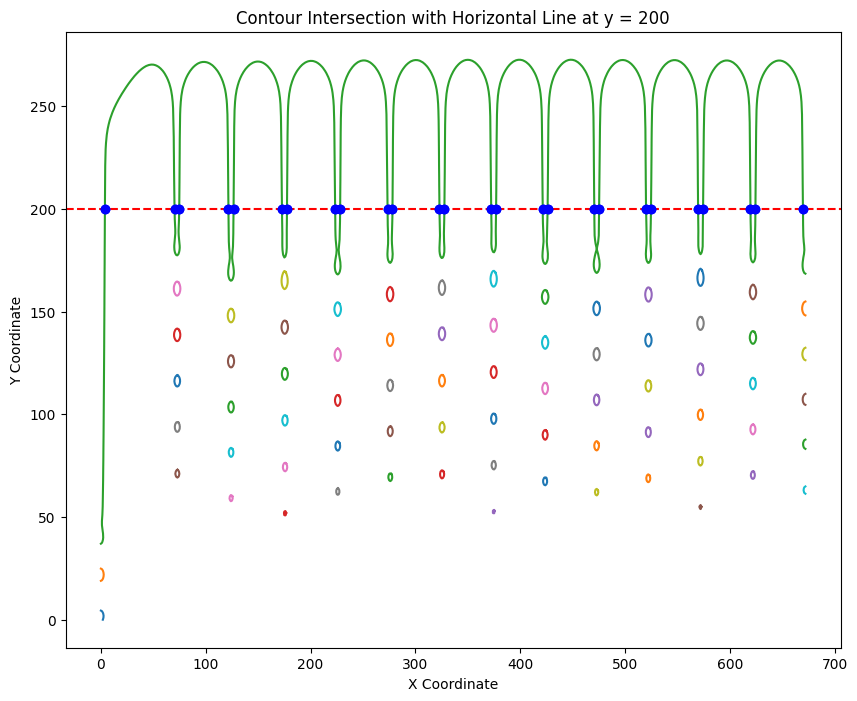

X-coordinates of intersections at y = 200: [3.83430379416585, 3.83430379416585, 70.24822838817882, 70.24822838817882, 74.73228681016617, 74.73228681016617, 121.65892778483145, 121.65892778483145, 126.5572777527971, 126.5572777527971, 172.74023272957035, 172.74023272957035, 177.52569669653164, 177.52569669653164, 223.43465847877613, 223.43465847877613, 228.2051772927226, 228.2051772927226, 273.3836568873378, 273.3836568873378, 278.1285526512558, 278.1285526512558, 322.94910566155806, 322.94910566155806, 327.63489420343944, 327.63489420343944, 372.29516314439826, 372.29516314439826, 376.93844841372464, 376.93844841372464, 421.4348300209918, 421.4348300209918, 426.1169803752893, 426.1169803752893, 470.6274504465258, 470.6274504465258, 475.2713546276182, 475.2713546276182, 519.9672148888378, 519.9672148888378, 524.693977843796, 524.693977843796, 569.6128521266204, 569.6128521266204, 574.3657951610353, 574.3657951610353, 619.5899580486004, 619.5899580486004, 624.3659927968664, 624.365992796

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Assuming Z is your phase field data array
contours = measure.find_contours(Z, 0)  # Adjust level if needed

# Define the y-value of the horizontal line
y_line = 200

# Function to calculate the x-coordinates of intersections
def find_x_intersections(contours, y_value):
    x_intersections = []
    for contour in contours:
        for i in range(len(contour) - 1):
            y1, x1 = contour[i]
            y2, x2 = contour[i + 1]
            # Check if the segment crosses the horizontal line
            if (y1 <= y_value <= y2) or (y2 <= y_value <= y1):
                # Linear interpolation to find the x coordinate
                if (y2 - y1) != 0:  # Avoid division by zero
                    x_intercept = x1 + (x2 - x1) * (y_value - y1) / (y2 - y1)
                    x_intersections.append(x_intercept)
    return x_intersections

# Get the x-coordinates of intersections
x_intersections = find_x_intersections(contours, y_line)

# Sorting the x-coordinates for better readability and analysis
x_intersections.sort()

# Plotting for visualization
plt.figure(figsize=(10, 8))
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], label='Contour')
plt.axhline(y=y_line, color='red', linestyle='--', label='y = 200')
plt.scatter(x_intersections, [y_line]*len(x_intersections), color='blue', zorder=5, label='Intersections')
plt.title('Contour Intersection with Horizontal Line at y = 200')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

# Printing the x coordinates of intersections
print("X-coordinates of intersections at y = 200:", x_intersections)


In [81]:
import numpy as np

# Example array of x-intersections

# Calculating widths of solid segments and spacings between them
solid_widths = []
solid_spacings = []

for i in range(0, len(x_intersections) - 1, 2):
    # Calculate the width of each solid segment
    if i + 1 < len(x_intersections):
        width = x_intersections[i + 1] - x_intersections[i]
        solid_widths.append(width)

    # Calculate spacing between solid segments
    if i + 2 < len(x_intersections):
        spacing = x_intersections[i + 2] - x_intersections[i + 1]
        solid_spacings.append(spacing)

# Output results
print("Widths of solid segments:", solid_widths)
print("Spacings between solid segments:", solid_spacings)


Widths of solid segments: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Spacings between solid segments: [66.41392459401297, 4.484058421987356, 46.926640974665276, 4.8983499679656575, 46.182954976773246, 4.785463966961288, 45.90896178224449, 4.770518813946467, 45.1784795946152, 4.744895763918009, 44.82055301030226, 4.685788541881379, 44.660268940958815, 4.643285269326384, 44.49638160726715, 4.682150354297505, 44.51047007123651, 4.6439041810924095, 44.69586026121959, 4.72676295495819, 44.91887428282439, 4.752943034414898, 45.22416288756506, 4.776034748266056, 45.25726596210359]


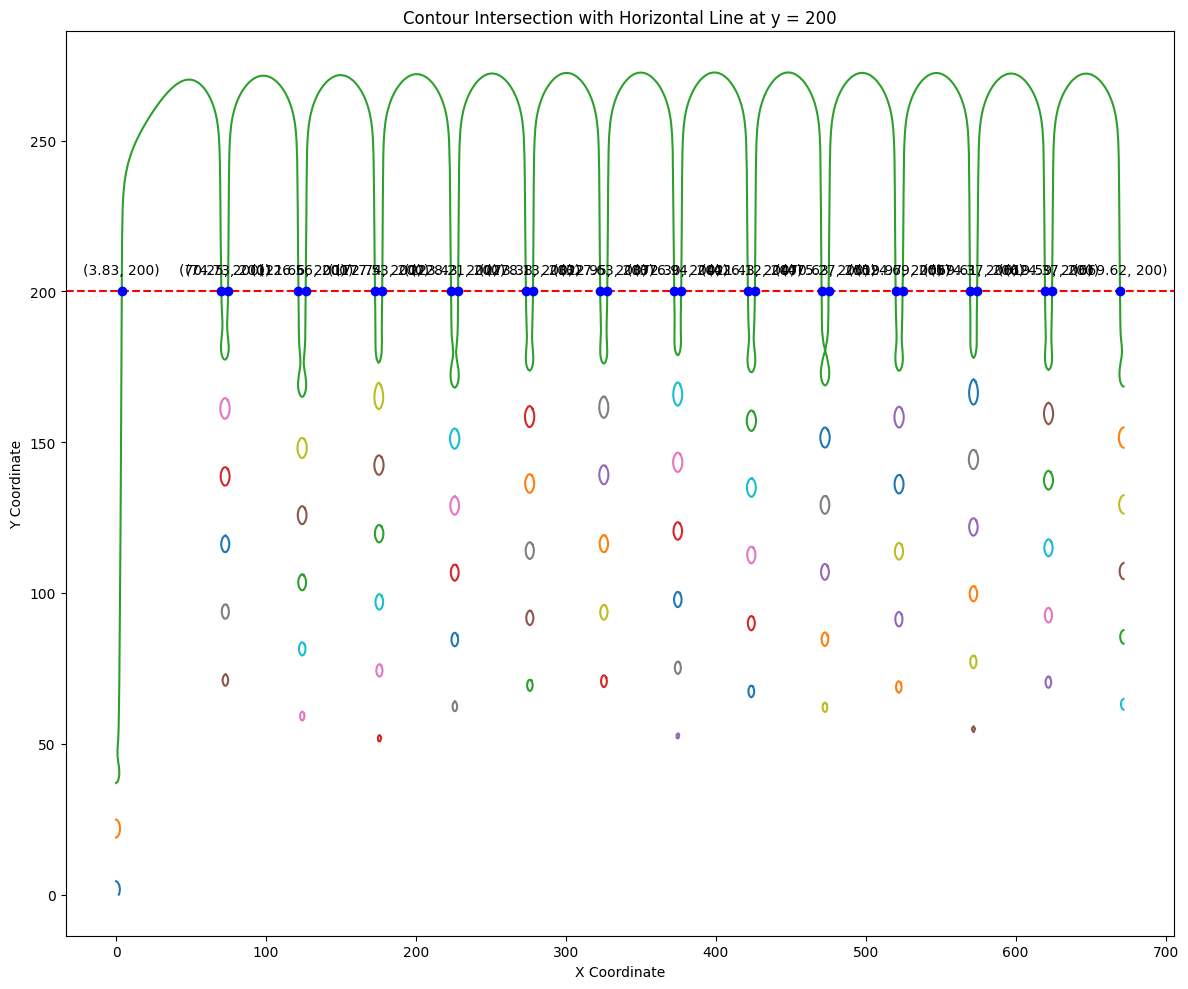

X-coordinates of intersections at y = 200: [3.83430379416585, 70.24822838817882, 74.73228681016617, 121.65892778483145, 126.5572777527971, 172.74023272957035, 177.52569669653164, 223.43465847877613, 228.2051772927226, 273.3836568873378, 278.1285526512558, 322.94910566155806, 327.63489420343944, 372.29516314439826, 376.93844841372464, 421.4348300209918, 426.1169803752893, 470.6274504465258, 475.2713546276182, 519.9672148888378, 524.693977843796, 569.6128521266204, 574.3657951610353, 619.5899580486004, 624.3659927968664, 669.62325875897]


In [90]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Assuming Z is your phase field data array
contours = measure.find_contours(Z, 0)  # Adjust level if needed

# Define the y-value of the horizontal line
y_line = 200

# Function to calculate the x-coordinates of intersections
def find_x_intersections(contours, y_value):
    x_intersections = []
    for contour in contours:
        for i in range(len(contour) - 1):
            y1, x1 = contour[i]
            y2, x2 = contour[i + 1]
            if (y1 <= y_value <= y2) or (y2 <= y_value <= y1):  # Segment crosses the line
                if (y2 - y1) != 0:  # Avoid division by zero
                    x_intercept = x1 + (x2 - x1) * (y_value - y1) / (y2 - y1)
                    x_intersections.append(x_intercept)
    return x_intersections

# Function to merge close points
def merge_close_points(points, threshold=1.0):
    if not points:
        return points
    points = sorted(points)
    merged_points = [points[0]]
    for point in points[1:]:
        if point - merged_points[-1] <= threshold:
            merged_points[-1] = (merged_points[-1] + point) / 2  # Average the points
        else:
            merged_points.append(point)
    return merged_points

# Get and merge close x-coordinates of intersections
x_intersections = find_x_intersections(contours, y_line)
x_intersections = merge_close_points(x_intersections, threshold=1.0)  # Adjust threshold as needed

# Plotting for visualization
plt.figure(figsize=(12, 10))
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], label='Contour')
plt.axhline(y=y_line, color='red', linestyle='--', label='Horizontal Line at y = 200')
plt.scatter(x_intersections, [y_line] * len(x_intersections), color='blue', zorder=5, label='Intersections')

# Annotate each intersection point with its coordinates
for x in x_intersections:
    plt.annotate(f'({x:.2f}, {y_line})', (x, y_line), textcoords="offset points", xytext=(0,10), ha='center', va='bottom', color='black', fontsize=10)

plt.title('Contour Intersection with Horizontal Line at y = 200')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.tight_layout()
plt.show()

# Printing the x coordinates of intersections
print("X-coordinates of intersections at y = 200:", x_intersections)


26


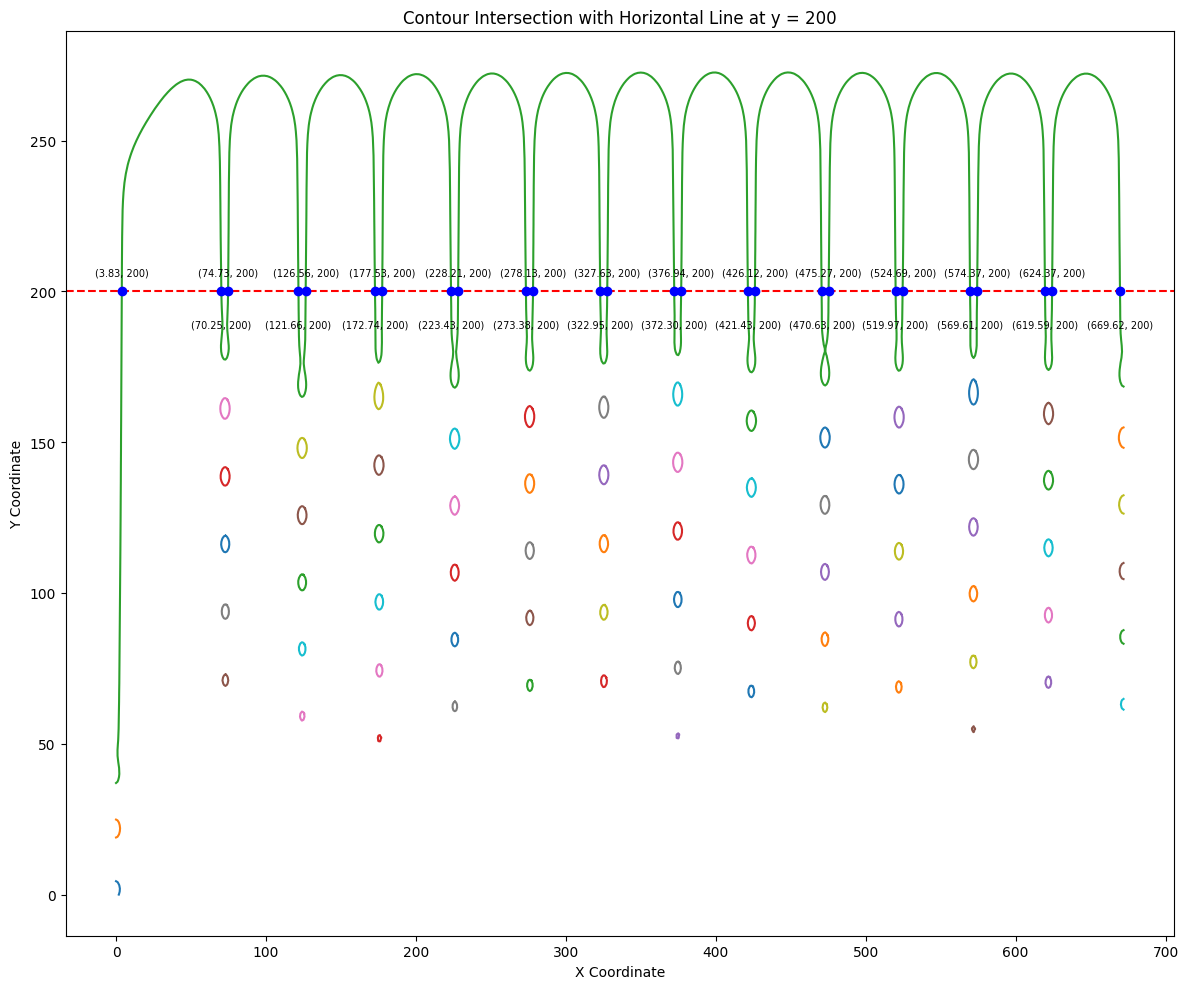

X-coordinates of intersections at y = 200: [3.83430379416585, 70.24822838817882, 74.73228681016617, 121.65892778483145, 126.5572777527971, 172.74023272957035, 177.52569669653164, 223.43465847877613, 228.2051772927226, 273.3836568873378, 278.1285526512558, 322.94910566155806, 327.63489420343944, 372.29516314439826, 376.93844841372464, 421.4348300209918, 426.1169803752893, 470.6274504465258, 475.2713546276182, 519.9672148888378, 524.693977843796, 569.6128521266204, 574.3657951610353, 619.5899580486004, 624.3659927968664, 669.62325875897]


In [104]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure

# Assuming Z is your phase field data array
contours = measure.find_contours(Z, 0)  # Adjust level if needed

# Define the y-value of the horizontal line
y_line = 200

def find_x_intersections(contours, y_value, min_distance=1.0):
    x_intersections = []
    for contour in contours:
        for i in range(len(contour) - 1):
            y1, x1 = contour[i]
            y2, x2 = contour[i + 1]
            if (y1 <= y_value <= y2) or (y2 <= y_value <= y1):  # Segment crosses the line
                if (y2 - y1) != 0:  # Avoid division by zero
                    x_intercept = x1 + (x2 - x1) * (y_value - y1) / (y2 - y1)
                    # Only add new intercept if it's sufficiently far from existing ones
                    if all(abs(x_intercept - x_existing) >= min_distance for x_existing in x_intersections):
                        x_intersections.append(x_intercept)
    return x_intersections

# Get the x-coordinates of intersections
x_intersections = find_x_intersections(contours, y_line)

# Sorting the x-coordinates for better readability and analysis
x_intersections.sort()

print(len(x_intersections))

# Plotting for visualization
plt.figure(figsize=(12, 10))
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], label='Contour')
plt.axhline(y=y_line, color='red', linestyle='--', label='Horizontal Line at y = 200')
plt.scatter(x_intersections, [y_line] * len(x_intersections), color='blue', zorder=5, label='Intersections')

# Annotating each intersection point with its coordinates, alternating up and down
for i, x in enumerate(x_intersections):
    vertical_offset = 10 if i % 2 == 0 else -20  # Alternating between above and below the line
    plt.annotate(f'({x:.2f}, {y_line})', (x, y_line), textcoords="offset points", xytext=(0, vertical_offset), ha='center', va='bottom' if i % 2 == 0 else 'top', color='black', fontsize=7)

plt.title('Contour Intersection with Horizontal Line at y = 200')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.tight_layout()
plt.show()

# Printing the x coordinates of intersections
print("X-coordinates of intersections at y = 200:", x_intersections)
